# Introduction + data used!
- In this assignment, you'll explore precipitation data!
<br><br>
- What you'll be analyzing is daily precipitation data for the continental US for the year 2020
<br><br>
- It's important to clarify that this is *liquid* precipitation - so snow is measured by its liquid equivalent 
<br><br>
- Want more information on the data? (You should! #metadataisimportant): 
https://psl.noaa.gov/data/gridded/data.unified.daily.conus.rt.html

#### Import xarray as xr, numpy as np, and pyplot from matplotlib as plt

In [78]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt

#### Let's access our dataset remotely without downloading it!  *I GIVE YOU THE CODE FOR THIS*

- this data is on an OpeNDAP server, which allows us to remotely access it and use it without downloading it
- more info on OpeNDAP: https://psl.noaa.gov/data/gridded/using_dods.html
- OpeNDAP is used by NOAA, NASA, etc.
<br><br>
- pass address of data on server into an Xarray open function, just like you would a usual, local-to-you file path (*I'll give you the code since you don't know Xarray yet!*)
<br><br>
- address of data: 'https://psl.noaa.gov/thredds/dodsC/Datasets/cpc_us_precip/RT/precip.V1.0.2020.nc'
   - seems to be a typo on the data webpage of the OpeNDAP link - so we'll use above
<br><br>
- having issues with this?  Make sure Netcdf4 module has been installed! Still issues?  *Post on Slack!*

In [79]:
import xarray as xr
# open_dataarray is one of the main functions in Xarray to open a Netcdf file!
remote_data = xr.open_dataarray('precip.V1.0.2020.nc')

#### Prints out information about the data in this Netcdf file.  *I GIVE YOU THE CODE FOR THIS*
- Remember: Netcdf is a binary file format, and we'll work a lot with it in future using the Xarray package, especially for *spatial* data!

In [80]:
# Prints
print(remote_data)
print()
print(remote_data.coords)

<xarray.DataArray 'precip' (time: 366, lat: 120, lon: 300)>
[13176000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31
Attributes:
    long_name:     Daily Accumulated Precipitation
    valid_range:   [  0. 400.]
    units:         mm
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    statistic:     Daily Accumulation
    parent_stat:   Observation
    actual_range:  [  0.      274.80292]

Coordinates:
  * lat      (lat) float32 20.12 20.38 20.62 20.88 ... 49.12 49.38 49.62 49.88
  * lon      (lon) float32 230.1 230.4 230.6 230.9 ... 304.1 304.4 304.6 304.9
  * time     (time) datetime64[ns] 2020-01-01 2020-01-02 ... 2020-12-31


## *YOUR TURN*:  
#### (1) Let's start thinking more about spatial data (much more to follow in next week's lessons!) Based on the metadata printed out above:
 - (a.)  what are units of this data - precip? 
<br><br>
 - (b.)  what are the coordinates of this data?  
    - You *MUST* include a description of the direction of the order of each of the spatial coordinates (northward? southward? eastward? westward?)

milimeters

Starting at an origin in the southwest at 20.12N 230.1E the points head northeast.

#### Save the coordinate variables of lat, lon, and time each to their own variable (technically, each a data array) *I GIVE YOU THE CODE FOR THIS*

In [81]:
lat2 = remote_data['lat'] # these are *coordinate* variables in the Netcdf file
print(lat2)
lon2 = remote_data['lon']
print(lon2)
times2 = remote_data['time']

<xarray.DataArray 'lat' (lat: 120)>
array([20.125, 20.375, 20.625, 20.875, 21.125, 21.375, 21.625, 21.875, 22.125,
       22.375, 22.625, 22.875, 23.125, 23.375, 23.625, 23.875, 24.125, 24.375,
       24.625, 24.875, 25.125, 25.375, 25.625, 25.875, 26.125, 26.375, 26.625,
       26.875, 27.125, 27.375, 27.625, 27.875, 28.125, 28.375, 28.625, 28.875,
       29.125, 29.375, 29.625, 29.875, 30.125, 30.375, 30.625, 30.875, 31.125,
       31.375, 31.625, 31.875, 32.125, 32.375, 32.625, 32.875, 33.125, 33.375,
       33.625, 33.875, 34.125, 34.375, 34.625, 34.875, 35.125, 35.375, 35.625,
       35.875, 36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
       38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875, 40.125,
       40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875, 42.125, 42.375,
       42.625, 42.875, 43.125, 43.375, 43.625, 43.875, 44.125, 44.375, 44.625,
       44.875, 45.125, 45.375, 45.625, 45.875, 46.125, 46.375, 46.625, 46.875,
       47.125, 4

#### Convert each of the three data arrays into a NumPy array  *I GIVE YOU THE CODE FOR THIS*
- Since you haven't learned Xarray yet, let's get data into a format you know how to work with!

In [82]:
precip = remote_data.values # nifty function that converts the Xarray data structure into a NumPy array
lat = lat2.values 
lon = lon2.values

## *YOUR TURN, AGAIN, FROM HERE TO END OF ASSIGNMENT*
#### (2)  Evaluating dimensions!
 - (a.) Evaluate and print the shape of each of these three NumPy arrays: lat, lon, and precip
<br><br>
 - (b.) What are the dimensions of precip, physically, based on your answer to (a.), and your work in Q1?  <br><br>
 - (c.) And what *order* are the dimensions in?

In [83]:
print(f'Shapes\n\tLat: {np.shape(lat)}\n\tLon: {np.shape(lon)}\n\tPrecip: {np.shape(precip)}\n')

Shapes
	Lat: (120,)
	Lon: (300,)
	Precip: (366, 120, 300)



B.
Time, latitude, longitude

C.
Time, latitude, longitude

#### (3)  Array operations - unit conversion
- (a.) Convert from mm of daily precip to inches using an array operation (i.e., not a loop, of course!)
<br><br>
- (b.) Comment on if what you just did would be faster or slower than doing this instead using a *for loop*. *Why* would this be the case, conceptually?

In [84]:
precip_in = np.copy(precip)
precip_in = precip_in*0.0393701

Doing this in a for loop would be terribly slow, as the loop would then be executed via interpreted Python, rather than via the C bindings. The advantage of the numpy C bindings is that it allows for efficent and optimized usage of vectorized (SIMD) CPU operations. SIMD instructions allow for a single instruction to operate upon multiple operands in modern 64bit (or larger) CPU registers at once. Some modern CPUs in current supercomputers such as the Knights Landing architecture (AVX-512) even include 512bit registers, to really make these big machines crunch arrays quickly.

#### (4)  Exploring daily precipitation data at the gridpoint nearest UIUC campus
- (a.) Determine, save to new variable(s), and print the indices of the nearest gridpoint to the UIUC campus. *You may need to use a NumPy function I haven't formally taught you to determine the indices of the gridpoint nearest UIUC campus - do some exploration! #healthy*
<br><br>
- (b.) Print the corresponding lat/lon of that gridpoint. 
<br><br>
- (c.) Evaluate and print the shape of your precip array when now only looking at precipitation data at this special location.  This will help you understand what exactly you're plotting in (d.) and (e.)
<br><br>
- (d.) Create a line plot of precipitation data at this special location.
   - Don't forget axis labels! And a title!
<br><br>
- (e.) Create a histogram of your precipitation data at this special location.  Please explicitly set the number of bins you think will be most appropriate to display the data in a way that is easy to interpret.

In [85]:
# how the hell?

In [86]:
# B
mod = 100
uiuc_lat = lat[mod]
uiuc_lon = lon[mod]
uiuc_lat_idx = mod
uiuc_lon_idx = mod
array_location = (uiuc_lat_idx, uiuc_lon_idx)
print(f'Location:\n\tLat: {uiuc_lat}\n\tLon: {uiuc_lon}')

Location:
	Lat: 45.125
	Lon: 255.125


In [87]:
# C
print(np.shape(precip[array_location]))


(300,)


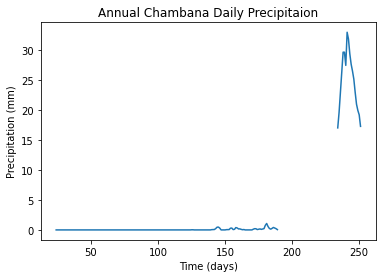

In [95]:
# D
plt.xlabel('Time (days)')
plt.ylabel('Precipitation (mm)')
plt.title('Annual Chambana Daily Precipitaion')
plt.plot(np.arange(300), precip[array_location])

(array([166.,   0.,   0.,   0.,   0.,   0.,   3.,   3.,   2.,   4.,   4.,
          2.]),
 array([ 0.       ,  2.7497272,  5.4994545,  8.249182 , 10.998909 ,
        13.748636 , 16.498363 , 19.24809  , 21.997818 , 24.747545 ,
        27.497272 , 30.247    , 32.996727 ], dtype=float32),
 <BarContainer object of 12 artists>)

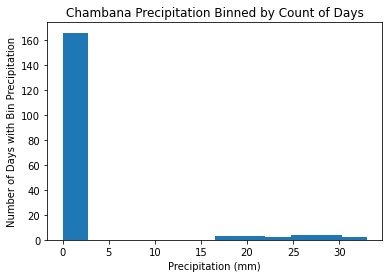

In [89]:
# E
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Days with Bin Precipitation')
plt.title('Chambana Precipitation Binned by Count of Days')
plt.hist(precip[array_location] , bins=12)

#### (5)  Calculate the following statistics for precip at this special location!
  - (a.) How many days did no precip fall?
<br><br>
  - (b.) How many days did more than one inch fall?
<br><br>
  - (c.) What was the maximum amount of precip that fell?
<br><br>
  - (d.) What day did it occur on?

In [90]:
# A
daily_values = precip_in[array_location] # Switching units from mm->in abruptly here.
daily_values_no_nan = daily_values[np.logical_not(np.isnan(daily_values))] # Filter nan
count_no_precip_days = daily_values[np.where(daily_values_no_nan==0)].size
print(f'There was no precipitation on {count_no_precip_days} days.')

There was no precipitation on 124 days.


In [91]:
# B
count_over_1in_precip_days = daily_values[np.where(daily_values_no_nan>1)].size
print(f'There was over one inch of  precipitation on {count_over_1in_precip_days} days.')

There was over one inch of  precipitation on 9 days.


In [92]:
print(f'There was over one inch of  precipitation on {np.max(daily_values_no_nan)} days.')

There was over one inch of  precipitation on 1.2990844249725342 days.
